In [1]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn.externals import joblib

# Combine metadata with embeddings and save to hdf5

In [2]:
categories = [
  'good_for_lunch', 
  'good_for_dinner', 
  'takes_reservations', 
  'outdoor_seating',
  'restaurant_is_expensive',
  'has_alcohol',
  'has_table_service',
  'ambience_is_classy',
  'good_for_kids'
]

vgg_cols = ['f' + str(i) for i in range(4096)]

# Test data preparations

In [3]:
test_photo_biz = pd.read_csv('data/test_photo_to_biz.csv')
ids = test_photo_biz.photo_id.drop_duplicates()

testPhotos = pd.DataFrame(np.load('data/VGG_4096_Xtest.npy'), columns=vgg_cols)
testPhotos.set_index(ids, inplace=True)
testPhotos.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f4086,f4087,f4088,f4089,f4090,f4091,f4092,f4093,f4094,f4095
photo_id,,,,,,,,,,,,,,,,,,,,,
317818,0.000000,1.282932,0.000000,0,0.000000,0,0.851275,0,0.000000,0.000000,...,0,0.000000,0,0.000000,0.751438,0.000000,0.000000,0.000000,0,0
30679,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0,1.220651,0.000000,...,0,0.000000,0,0.000000,0.000000,1.430037,0.000000,1.335587,0,0
455084,0.000000,0.000000,0.242226,0,5.327094,0,0.699824,0,0.000000,0.000000,...,0,1.366249,0,0.000000,0.000000,0.000000,0.000000,0.627894,0,0
371381,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0,0.037849,0.000000,...,0,0.000000,0,0.711921,3.742042,0.000000,0.000000,0.000000,0,0
86224,1.074553,0.000000,1.790671,0,0.000000,0,0.726157,0,0.141989,0.818177,...,0,0.000000,0,0.000000,0.000000,6.045853,1.137192,0.292165,0,0


## Part 1

In [4]:
test_photo_biz_sorted = test_photo_biz.sort_values(['business_id', 'photo_id'], ascending=[True, True])

In [5]:
test_photo_biz_sorted_5vbik = test_photo_biz_sorted[:200523]
test_photo_biz_sorted = test_photo_biz_sorted[200523:]

In [6]:
test_photo_biz_sorted_5vbik.tail()

,photo_id,business_id
200509,427592,5vbik
200501,432550,5vbik
200499,434919,5vbik
200494,463649,5vbik
200485,467332,5vbik


In [8]:
Xtestpart = test_photo_biz_sorted_5vbik.join(testPhotos, on='photo_id')
Xtestpart.isnull().sum().sum()

In [10]:
Xtestpart.to_hdf('data/Xtest_dataframe_part1.hdf5', 'Xtest')

## Part 2

In [7]:
test_photo_biz_sorted_bv1ga = test_photo_biz_sorted[:200029]
test_photo_biz_sorted = test_photo_biz_sorted[200029:]

In [8]:
test_photo_biz_sorted_bv1ga.tail()

,photo_id,business_id
400513,428851,bv1ga
400547,439452,bv1ga
400484,449669,bv1ga
400474,464365,bv1ga
400522,469292,bv1ga


In [9]:
Xtestpart = test_photo_biz_sorted_bv1ga.join(testPhotos, on='photo_id')
Xtestpart.isnull().sum().sum()

0

In [10]:
Xtestpart.to_hdf('data/Xtest_dataframe_part2.hdf5', 'Xtest')

## Part 3

In [9]:
test_photo_biz_sorted_hxji0 = test_photo_biz_sorted[:200051]
test_photo_biz_sorted = test_photo_biz_sorted[200051:]

In [10]:
test_photo_biz_sorted_hxji0.tail()

,photo_id,business_id
600546,446612,hxji0
600594,447562,hxji0
600599,459632,hxji0
600552,461540,hxji0
600554,462109,hxji0


In [11]:
Xtestpart = test_photo_biz_sorted_hxji0.join(testPhotos, on='photo_id')
Xtestpart.isnull().sum().sum()

0

In [12]:
Xtestpart.to_hdf('data/Xtest_dataframe_part3.hdf5', 'Xtest')

## Part 4

In [11]:
test_photo_biz_sorted_o7cxi = test_photo_biz_sorted[:200009]
test_photo_biz_sorted = test_photo_biz_sorted[200009:]

In [12]:
test_photo_biz_sorted_o7cxi.tail()

,photo_id,business_id
800565,444557,o7cxi
800602,446330,o7cxi
800545,457279,o7cxi
800494,457605,o7cxi
800586,458911,o7cxi


In [13]:
Xtestpart = test_photo_biz_sorted_o7cxi.join(testPhotos, on='photo_id')
Xtestpart.isnull().sum().sum()

0

In [14]:
Xtestpart.to_hdf('data/Xtest_dataframe_part4.hdf5', 'Xtest')

## Part 5

In [13]:
test_photo_biz_sorted_ug8r3 = test_photo_biz_sorted[:200027]
test_photo_biz_sorted = test_photo_biz_sorted[200027:]

In [14]:
test_photo_biz_sorted_ug8r3.tail()

,photo_id,business_id
1000558,467653,ug8r3
1000581,469187,ug8r3
1000351,470293,ug8r3
1000233,470902,ug8r3
1000137,471315,ug8r3


In [15]:
Xtestpart = test_photo_biz_sorted_ug8r3.join(testPhotos, on='photo_id')
Xtestpart.isnull().sum().sum()

0

In [16]:
Xtestpart.to_hdf('data/Xtest_dataframe_part5.hdf5', 'Xtest')

## Part 6

In [15]:
test_photo_biz_sorted.head()

,photo_id,business_id
1000670,15474,ugcgl
1000659,25444,ugcgl
1000669,46443,ugcgl
1000710,49444,ugcgl
1000707,50532,ugcgl


In [16]:
Xtestpart = test_photo_biz_sorted.join(testPhotos, on='photo_id')
Xtestpart.isnull().sum().sum()

0

In [17]:
Xtestpart.to_hdf('data/Xtest_dataframe_part6.hdf5', 'Xtest')

# Train data preparations

In [3]:
# train_biz_labels = pd.read_csv('data/train.csv')
# train_photo_biz = pd.read_csv('data/train_photo_to_biz_ids.csv')
# train_biz_labels.dropna(inplace=True)
# train = pd.merge(train_photo_biz, train_biz_labels, on='business_id')

# for i in range(len(categories)):
#   train[categories[i]] = train['labels'].str.contains(str(i)).astype(int)
  
# Xtrain = pd.concat([train, pd.DataFrame(np.load('data/VGG_4096_Xtrain_full.npy'), columns=vgg_cols)], axis=1, join='inner')
# Xtrain.to_hdf('data/Xtrain_full_dataframe.ndf5', 'Xtrain')

In [3]:
Xtrain = pd.read_hdf('data/ta/Xtrain_full_dataframe.ndf5', 'Xtrain')

In [4]:
Xtrain.head()

,photo_id,business_id,labels,good_for_lunch,good_for_dinner,takes_reservations,outdoor_seating,restaurant_is_expensive,has_alcohol,has_table_service,...,f4086,f4087,f4088,f4089,f4090,f4091,f4092,f4093,f4094,f4095
0,204149,3034,3 8,0,0,0,1,0,0,0,...,0.00000,0.000000,0,0.000000,0,0.118222,0.000000,0.058655,0.000000,0
1,48723,3034,3 8,0,0,0,1,0,0,0,...,0.00000,1.323789,0,0.000000,0,0.226294,0.392975,0.000000,4.784612,0
2,94586,3034,3 8,0,0,0,1,0,0,0,...,0.00000,1.205008,0,2.414163,0,0.000000,0.000000,0.586437,0.000000,0
3,74369,3034,3 8,0,0,0,1,0,0,0,...,0.00000,0.063151,0,0.000000,0,2.420469,0.000000,0.000000,0.000000,0
4,95287,3034,3 8,0,0,0,1,0,0,0,...,0.23825,1.356925,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0


2 2974 117.50751503 205.164285908


<Container object of 1996 artists>

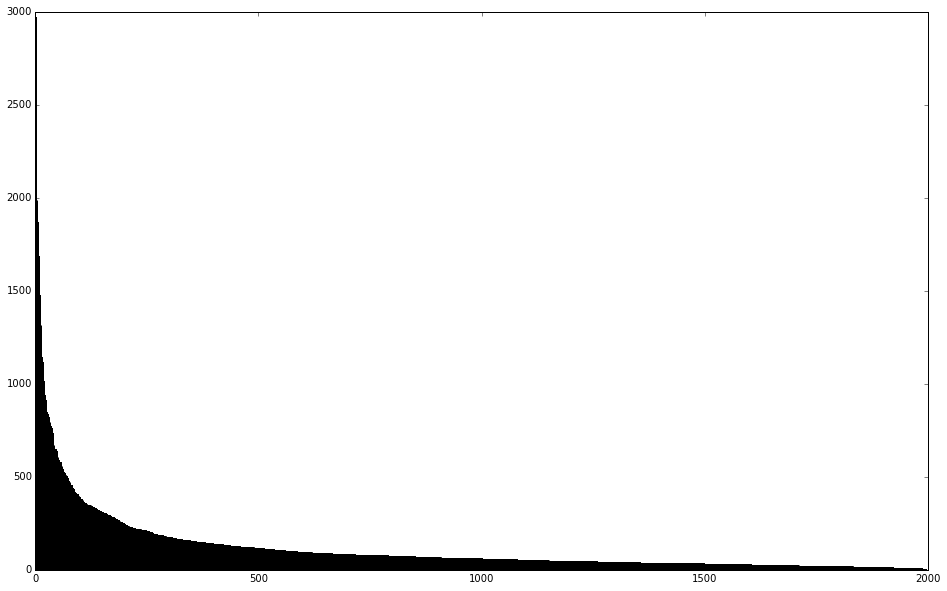

In [8]:
valcounts = Xtrain['business_id'].value_counts()
print np.min(valcounts), np.max(valcounts), np.mean(valcounts), np.std(valcounts)
plt.bar(np.arange(len(valcounts)),  valcounts)

In [5]:
Xtrain_groupped = Xtrain.groupby('business_id').mean()

In [6]:
Xtrain_groupped.head()

,photo_id,good_for_lunch,good_for_dinner,takes_reservations,outdoor_seating,restaurant_is_expensive,has_alcohol,has_table_service,ambience_is_classy,good_for_kids,...,f4086,f4087,f4088,f4089,f4090,f4091,f4092,f4093,f4094,f4095
business_id,,,,,,,,,,,,,,,,,,,,,
3,261969,1,0,0,0,0,0,0,0,1,...,0.007249,0.452920,0.277360,0.028470,0.027481,0.340723,0.350937,0.150377,0.827096,0.310476
4,245907,0,1,1,0,1,1,1,0,0,...,0.042417,0.539232,0.020760,0.206957,0.137461,1.384346,0.326804,1.209206,0.431742,0.208751
5,240687,0,1,1,0,1,1,1,1,0,...,0.170661,0.479241,0.137212,0.358951,0.082067,0.741180,0.614163,0.973072,0.266674,0.462403
6,242288,1,1,0,0,0,0,1,0,1,...,0.170635,0.416276,0.071811,0.153674,0.100524,0.809660,0.252170,0.495948,0.281671,0.135276
7,218456,1,1,0,0,0,0,0,0,1,...,0.105264,0.273392,0.097081,0.247766,0.283528,0.427665,0.297862,0.199000,0.463848,0.425252


In [7]:
Xtrain_groupped.to_hdf('data/Xtrain_grouped.hdf5', 'Xtrain')

In [8]:
X = np.array(Xtrain_groupped[vgg_cols], dtype=np.float32)
X.shape

(1996, 4096)

In [9]:
Y = np.array(Xtrain_groupped[categories], dtype=np.uint8)
Y.shape

(1996, 9)

In [10]:
random_state = np.random.RandomState(0)
Xtrain, Xval, ytrain, yval = train_test_split(X, Y, test_size=.2, random_state=random_state)

print Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

(1596, 4096) (400, 4096) (1596, 9) (400, 9)


In [12]:
import time

In [13]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True), n_jobs=-1)

start = time.time()
classifier.fit(Xtrain, ytrain)
print time.time() - start, 'seconds passed'

105.271114111 seconds passed


In [14]:
print f1_score(ytrain, classifier.predict(Xtrain), average='micro')
print f1_score(yval, classifier.predict(Xval), average='micro')

1.0
0.799199084668


In [14]:
joblib.dump(classifier, 'models/svm_over_vgg_classifier.pkl') 

['models/svm_over_vgg_classifier.pkl',
 'models/svm_over_vgg_classifier.pkl_01.npy',
 'models/svm_over_vgg_classifier.pkl_02.npy',
 'models/svm_over_vgg_classifier.pkl_03.npy',
 'models/svm_over_vgg_classifier.pkl_04.npy',
 'models/svm_over_vgg_classifier.pkl_05.npy',
 'models/svm_over_vgg_classifier.pkl_06.npy',
 'models/svm_over_vgg_classifier.pkl_07.npy',
 'models/svm_over_vgg_classifier.pkl_08.npy',
 'models/svm_over_vgg_classifier.pkl_09.npy',
 'models/svm_over_vgg_classifier.pkl_10.npy',
 'models/svm_over_vgg_classifier.pkl_11.npy',
 'models/svm_over_vgg_classifier.pkl_12.npy',
 'models/svm_over_vgg_classifier.pkl_13.npy',
 'models/svm_over_vgg_classifier.pkl_14.npy',
 'models/svm_over_vgg_classifier.pkl_15.npy',
 'models/svm_over_vgg_classifier.pkl_16.npy',
 'models/svm_over_vgg_classifier.pkl_17.npy',
 'models/svm_over_vgg_classifier.pkl_18.npy',
 'models/svm_over_vgg_classifier.pkl_19.npy',
 'models/svm_over_vgg_classifier.pkl_20.npy',
 'models/svm_over_vgg_classifier.pkl_21.n

## Fit on full train data

In [16]:
start = time.time()
classifier.fit(X, Y)
print time.time() - start, 'seconds passed'

171.946300983 seconds passed


In [17]:
# Both should be 1.0

print f1_score(ytrain, classifier.predict(Xtrain), average='micro')
print f1_score(yval, classifier.predict(Xval), average='micro')

1.0
1.0


In [18]:
joblib.dump(classifier, 'models/svm_over_vgg_FULL/clf.pkl') 

['models/svm_over_vgg_FULL/clf.pkl',
 'models/svm_over_vgg_FULL/clf.pkl_01.npy',
 'models/svm_over_vgg_FULL/clf.pkl_02.npy',
 'models/svm_over_vgg_FULL/clf.pkl_03.npy',
 'models/svm_over_vgg_FULL/clf.pkl_04.npy',
 'models/svm_over_vgg_FULL/clf.pkl_05.npy',
 'models/svm_over_vgg_FULL/clf.pkl_06.npy',
 'models/svm_over_vgg_FULL/clf.pkl_07.npy',
 'models/svm_over_vgg_FULL/clf.pkl_08.npy',
 'models/svm_over_vgg_FULL/clf.pkl_09.npy',
 'models/svm_over_vgg_FULL/clf.pkl_10.npy',
 'models/svm_over_vgg_FULL/clf.pkl_11.npy',
 'models/svm_over_vgg_FULL/clf.pkl_12.npy',
 'models/svm_over_vgg_FULL/clf.pkl_13.npy',
 'models/svm_over_vgg_FULL/clf.pkl_14.npy',
 'models/svm_over_vgg_FULL/clf.pkl_15.npy',
 'models/svm_over_vgg_FULL/clf.pkl_16.npy',
 'models/svm_over_vgg_FULL/clf.pkl_17.npy',
 'models/svm_over_vgg_FULL/clf.pkl_18.npy',
 'models/svm_over_vgg_FULL/clf.pkl_19.npy',
 'models/svm_over_vgg_FULL/clf.pkl_20.npy',
 'models/svm_over_vgg_FULL/clf.pkl_21.npy',
 'models/svm_over_vgg_FULL/clf.pkl_22.n